<a href="https://colab.research.google.com/github/Carocschall/CoderHouse/blob/main/DataScienceIII_CortezSchall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA SCIENCE III: NLP Y DEEP LEARNING APLICADO A LA CIENCIA DE DATOS - Sentiment Analysis**



Alumna: Carolina Cortez Schall

# **Presentación del proyecto**

Abstracto con Motivación y Audiencia

Contexto Comercial y Analítico

Preguntas/Hipótesis a Resolver

Objetivo

# **Lectura de datos**

### **Librerias necesarias**

In [39]:
!python -m spacy download es_core_news_sm
! pip install -U symspellpy
import nltk # importar natural language toolkit
nltk.download('punkt')
nltk.download('stopwords') # modulo para descargar stopwords en diferentes idiomas
nltk.download('wordnet')
from nltk.corpus import stopwords
import pandas as pd
import numpy  as np
import re
import string
import plotly
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import time
import spacy
import es_core_news_sm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from wordcloud import WordCloud
import pickle
from symspellpy import SymSpell
import pkg_resources
from symspellpy import SymSpell, Verbosity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 40.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Carga de datos**

In [63]:
import requests
from bs4 import BeautifulSoup

# El ensayo que analizaremos se encuentra en Medium
url = "https://medium.com/kambrica/a-20-a%C3%B1os-del-innotec-visualizando-las-relaciones-encuentros-y-desencuentros-entre-ciencia-2c3b36bb53f9"

# El código suele traer contenido que no es relevante para análisis. Para esto identificamos frases para identificar el inicio y el fin del contenido relevante
frase_inicial = "En 2004, el IAPG (Instituto Argentino del Petróleo y el Gas)"
frase_final = "aportando lo mejor que tenemos para construir un mundo mejor."

# Enviar una solicitud GET para obtener el contenido HTML bruto
response = requests.get(url)
if response.status_code == 200: #valida si la página carga correctamente
    # Parsear el contenido HTML (para que Python lo entienda) usando BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extraer todo el texto de las etiquetas de párrafo
    paragraphs = soup.find_all('p')
    article_text = '\n'.join([para.get_text() for para in paragraphs])#se une todo el texto y separa salto de linea

    # Extraer la porción relevante del texto
    start_index = article_text.find(frase_inicial)
    end_index = article_text.find(frase_final) + len(frase_final)
#Si ambas frases (inicial y final) se encuentran en el texto, se extrae el bloque de texto entre esas frases.
    if start_index != -1 and end_index != -1:
        texto_relevante = article_text[start_index:end_index]
        print(texto_relevante)
    else:
        print("No se encontraron las frases especificadas en el artículo.")
else:
    print(f"Fallo al recuperar la página web. Código de estado: {response.status_code}")

En 2004, el IAPG (Instituto Argentino del Petróleo y el Gas) y la SPE de Argentina (capítulo local de la Society Of Petroleum Engineers), organizaron el iNNotec: 1er Expo-Congreso de Innovación Tecnológica en Energía y Petroquímica.
El Director General del IAPG, Roberto E. Cunningham, decidicó que un congreso de innovación merecía una introducción innovadora: su “Sainete Criollo de Inocencio Ricerca y Empresio Mandattori”.
En lugar de un tradicional discurso, desarrolló los temas de la conferencia en una obra de teatro leído, que sería dirigida por Claudio Moreno e interpretada por Páncho Ibáñez y Hugo Bob Quintela, con el apoyo de infografías, animaciones e imágenes situacionales cuyo diseño y desarrollo tuve a cargo.
En sus propias palabras:
…Sentí la necesidad de redactar algunas pautas, algo así como un manual instructivo a ser seguido por un científico toda vez que le tocara exponer ante un empresario. Así lo hice, pero no quedé conforme, pues veía el texto desarrollado como

## **Lectura del corpus**

In [68]:
#importamos los paquetes a utilizar
import nltk
nltk.download('punkt')
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
import nltk
import requests
from bs4 import BeautifulSoup

# ... (your existing code to fetch and extract text) ...

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

# Apply word tokenization
tokenized_palabra = word_tokenize(texto_relevante)
print(tokenized_palabra)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['En', '2004', ',', 'el', 'IAPG', '(', 'Instituto', 'Argentino', 'del', 'Petróleo', 'y', 'el', 'Gas', ')', 'y', 'la', 'SPE', 'de', 'Argentina', '(', 'capítulo', 'local', 'de', 'la', 'Society', 'Of', 'Petroleum', 'Engineers', ')', ',', 'organizaron', 'el', 'iNNotec', ':', '1er', 'Expo-Congreso', 'de', 'Innovación', 'Tecnológica', 'en', 'Energía', 'y', 'Petroquímica', '.', 'El', 'Director', 'General', 'del', 'IAPG', ',', 'Roberto', 'E.', 'Cunningham', ',', 'decidicó', 'que', 'un', 'congreso', 'de', 'innovación', 'merecía', 'una', 'introducción', 'innovadora', ':', 'su', '“', 'Sainete', 'Criollo', 'de', 'Inocencio', 'Ricerca', 'y', 'Empresio', 'Mandattori', '”', '.', 'En', 'lugar', 'de', 'un', 'tradicional', 'discurso', ',', 'desarrolló', 'los', 'temas', 'de', 'la', 'conferencia', 'en', 'una', 'obra', 'de', 'teatro', 'leído', ',', 'que', 'sería', 'dirigida', 'por', 'Claudio', 'Moreno', 'e', 'interpretada', 'por', 'Páncho', 'Ibáñez', 'y', 'Hugo', 'Bob', 'Quintela', ',', 'con', 'el', 'apoyo

In [69]:
#Aplicamos metodo  para tokenizar oracion
tokenized_oracion=sent_tokenize(texto_relevante)
print(tokenized_oracion)

['En 2004, el IAPG (Instituto Argentino del Petróleo y el Gas) y la SPE de Argentina (capítulo local de la Society Of Petroleum Engineers), organizaron el iNNotec: 1er Expo-Congreso de Innovación Tecnológica en Energía y Petroquímica.', 'El Director General del IAPG, Roberto E. Cunningham, decidicó que un congreso de innovación merecía una introducción innovadora: su “Sainete Criollo de Inocencio Ricerca y Empresio Mandattori”.', 'En lugar de un tradicional discurso, desarrolló los temas de la conferencia en una obra de teatro leído, que sería dirigida por Claudio Moreno e interpretada por Páncho Ibáñez y Hugo Bob Quintela, con el apoyo de infografías, animaciones e imágenes situacionales cuyo diseño y desarrollo tuve a cargo.', 'En sus propias palabras:\n…Sentí la necesidad de redactar algunas pautas, algo así como un manual instructivo a ser seguido por un científico toda vez que le tocara exponer ante un empresario.', 'Así lo hice, pero no quedé conforme, pues veía el texto de

In [67]:
import es_core_news_md
nlp = es_core_news_md.load()

**Conteo de palabras**

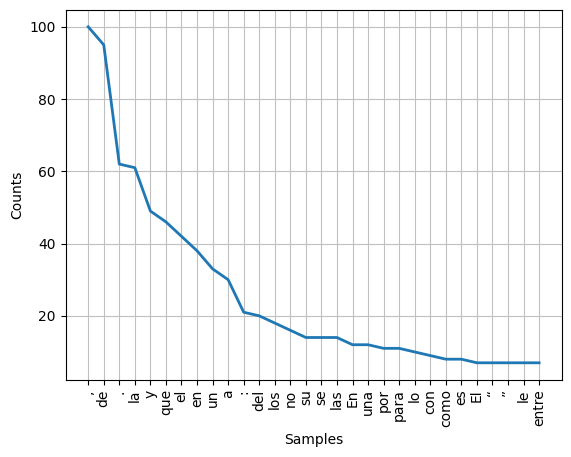

In [70]:
fdist = FreqDist(tokenized_palabra)
fdist.plot(30,cumulative=False)
plt.show()

**Stopwords**

In [71]:
#usamos los stopwords en espanol y damos un vistazo
stop_words=set(stopwords.words("spanish"))
print(stop_words)

{'como', 'tenían', 'hubieran', 'serás', 'estad', 'míos', 'vosotras', 'otros', 'tendré', 'tuviera', 'tuyas', 'tuvierais', 'habré', 'fuesen', 'con', 'quien', 'habría', 'habíamos', 'estemos', 'éramos', 'los', 'fuéramos', 'habían', 'teníais', 'estéis', 'sea', 'en', 'estuvisteis', 'soy', 'todo', 'hemos', 'nosotras', 'tenidos', 'mucho', 'hubimos', 'está', 'estaba', 'estaremos', 'hubo', 'unos', 'estáis', 'estas', 'estadas', 'estoy', 'han', 'hube', 'tenías', 'eras', 'antes', 'habida', 'tuvieras', 'hayas', 'sí', 'pero', 'fuerais', 'esté', 'cual', 'estaríais', 'ese', 'estaría', 'hubiste', 'habrá', 'serías', 'todos', 'hubieras', 'hayamos', 'sentidos', 'estará', 'vuestra', 'un', 'tengáis', 'sentid', 'ella', 'tuvieran', 'algunos', 'mías', 'sintiendo', 'fuiste', 'teniendo', 'fueron', 'y', 'tuyo', 'tuvieseis', 'seríais', 'poco', 'tendrán', 'seréis', 'para', 'de', 'quienes', 'estuvieras', 'serán', 'habrán', 'porque', 'tuviésemos', 'también', 'hubiese', 'tendría', 'tuviese', 'tenía', 'durante', 'tendre

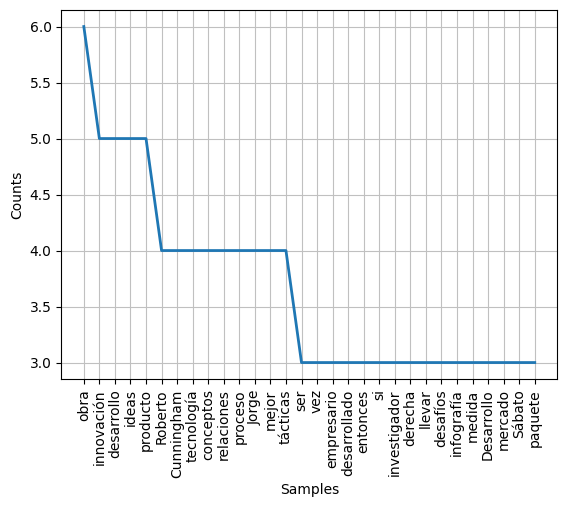

In [72]:
#Ahora comparamos el gráfico de frecuencia de palabras con y sin stopwords adicionalmente excluimos los símbolos
tokenized_palabra_stopwords = [word for word in tokenized_palabra if word.lower() not in stop_words and word.isalpha()]

# Calculamos la distribución de frecuencia
fdist_stopwords = FreqDist(tokenized_palabra_stopwords)
# Graficamos la distribución de frecuencia del top 30 palabras mas conumes
fdist_stopwords.plot(30, cumulative=False)
plt.show()

**Nube de palabras**

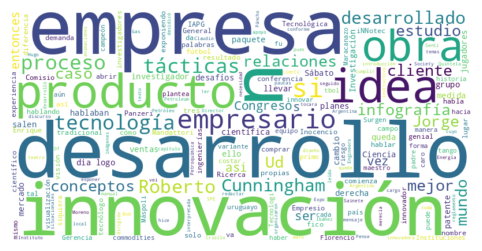

In [73]:
# Creamos un objeto de nube de palabras
wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = 'white',
    stopwords = stop_words
).generate(texto_relevante)

# Mostramos la nube de palabras generada
plt.figure(figsize=(8, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**N-grams**

In [74]:
# Aplicamos funcion para calcular n-grams
def get_ngrams(text, n):
    n_grams = ngrams(text, n)
    return Counter(n_grams)

# Calcular bigrams, trigrams y 4-grams
bigrams = get_ngrams(tokenized_palabra_stopwords, 2)
trigrams = get_ngrams(tokenized_palabra_stopwords, 3)
fourgrams = get_ngrams(tokenized_palabra_stopwords, 4)

# Imprimir los n-grams más comunes
print("Bigrams más comunes:")
print(bigrams.most_common(10))

print("\nTrigrams más comunes:")
print(trigrams.most_common(10))

print("\n4-grams más comunes:")
print(fourgrams.most_common(10))

Bigrams más comunes:
[(('Roberto', 'Cunningham'), 3), (('Inocencio', 'Ricerca'), 2), (('Empresio', 'Mandattori'), 2), (('lugar', 'tradicional'), 2), (('propias', 'palabras'), 2), (('conceptos', 'relaciones'), 2), (('desafíos', 'llevar'), 2), (('Jorge', 'Sábato'), 2), (('Empresas', 'Instituciones'), 2), (('innovar', 'puede'), 2)]

Trigrams más comunes:
[(('innovar', 'puede', 'costar'), 2), (('puede', 'costar', 'caro'), 2), (('IAPG', 'Instituto', 'Argentino'), 1), (('Instituto', 'Argentino', 'Petróleo'), 1), (('Argentino', 'Petróleo', 'Gas'), 1), (('Petróleo', 'Gas', 'SPE'), 1), (('Gas', 'SPE', 'Argentina'), 1), (('SPE', 'Argentina', 'capítulo'), 1), (('Argentina', 'capítulo', 'local'), 1), (('capítulo', 'local', 'Society'), 1)]

4-grams más comunes:
[(('innovar', 'puede', 'costar', 'caro'), 2), (('IAPG', 'Instituto', 'Argentino', 'Petróleo'), 1), (('Instituto', 'Argentino', 'Petróleo', 'Gas'), 1), (('Argentino', 'Petróleo', 'Gas', 'SPE'), 1), (('Petróleo', 'Gas', 'SPE', 'Argentina'), 1)

# **Análisis inicial**

# **Análisis Exploratorio**

**Análisis de la Longitud de las Oraciones**

**Análisis de la Frecuencia de Palabras**

In [30]:
import numpy as np

# Assuming 'path' is a list of lists or a 2D numpy array containing strings:

# Create a dictionary to store word frequencies
frecuencia_total = {}

# Iterate through all strings in 'path'
for sublist in path:  # If path is a list of lists
    for word in sublist:
        frecuencia_total[word] = frecuencia_total.get(word, 0) + 1
        # If word is not in dictionary, initialize to 0 and add 1
        # If word is in dictionary, increment count by 1

# Convert the dictionary to a list of (word, frequency) tuples
frecuencia_total_list = list(frecuencia_total.items())

# Sort the list by frequency in descending order
frecuencia_total_list.sort(key=lambda item: item[1], reverse=True)

# Get the top 5 most frequent words and their frequencies
palabras_mas_frecuentes = [word for word, freq in frecuencia_total_list[:5]]
frecuencias_mas_frecuentes = [freq for word, freq in frecuencia_total_list[:5]]

# Print the results
print("Palabras más frecuentes:")
for palabra, frecuencia in zip(palabras_mas_frecuentes, frecuencias_mas_frecuentes):
    print(f"{palabra}: {frecuencia}")

Palabras más frecuentes:
/: 8
e: 5
s: 5
o: 4
a: 4


**Análisis de las Partes del Discurso (POS)**

In [17]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Descargar los taggers si es necesario
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Función para etiquetar las partes del discurso
def pos_tagging(texto):
    tokens = word_tokenize(texto)
    return pos_tag(tokens)
# Definir el DF
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
print(df)
# Aplicar la función a la columna 'texto' y crear una nueva columna 'pos_tags'
df['pos_tags'] = df['texto'].apply(pos_tagging)

# Mostrar las primeras 5 filas con las etiquetas POS
print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


NameError: name 'df' is not defined

In [19]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Descargar los taggers si es necesario
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Función para etiquetar las partes del discurso
def pos_tagging(texto):
    tokens = word_tokenize(texto)
    return pos_tag(tokens)

# Assuming your data is in a CSV file named 'your_data.csv'
# Replace 'your_data.csv' with the actual file name
df = pd.read_csv('your_data.csv')  # Load your data into a pandas DataFrame

# Aplicar la función a la columna 'texto' y crear una nueva columna 'pos_tags'
df['pos_tags'] = df['texto'].apply(pos_tagging)

# Mostrar las primeras 5 filas con las etiquetas POS
print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


FileNotFoundError: [Errno 2] No such file or directory: 'your_data.csv'

**Análisis de la Distribución de Longitud de Palabras**

In [26]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import numpy as np  # Import numpy for calculations
import matplotlib.pyplot as plt  # Import matplotlib for visualization


# Replace 'your_text_data.csv' with the actual file path if it's not in the same directory
file_path = 'your_text_data.csv'
# or
#file_path = '/path/to/your/your_text_data.csv' # if the file is not in the same dir

try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please check the file path.")
    # Handle the error gracefully, e.g., exit the script or use a default dataset
    #exit()

# ... (rest of the code remains the same) ...

Error: File not found at 'your_text_data.csv'. Please check the file path.


**Distribución de la Frecuencia de Palabras Únicas**

In [25]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Load your text data into a Pandas DataFrame
data = pd.read_csv('data.csv')

# Function to count word frequencies
def word_frequency_distribution(text):
    words = word_tokenize(text)
    word_counts = Counter(words)
    return word_counts

# Apply the function to the text column
data['word_counts'] = data['text_column'].apply(word_frequency_distribution)

# Flatten the list of word counts
all_word_counts = Counter()
for counts in data['word_counts']:
    all_word_counts.update(counts)

# Get the most common words
most_common_words = all_word_counts.most_common(10)

# Visualize the distribution
plt.bar([word[0] for word in most_common_words], [word[1] for word in most_common_words])
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Most Common Words")
plt.xticks(rotation=45)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [24]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt  # Make sure to import pyplot

# Replace 'your_text_data.csv' with the actual file path
file_path = 'your_text_data.csv'
# or if the file is not in the same dir as your code
# file_path = '/path/to/your/your_text_data.csv'

try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please check the file path.")
    # Handle the error gracefully, e.g., exit the script or use a default dataset
    # For now, let's raise the error to stop execution
    raise

# Function to count word frequencies
def word_frequency_distribution(text):
    words = word_tokenize(text)
    word_counts = Counter(words)
    return word_counts

# Assuming your text data column is named 'text_column'
# Change 'text_column' to the actual name if different
data['word_counts'] = data['text_column'].apply(word_frequency_distribution)

# Flatten the list of word counts
all_word_counts = Counter()
for counts in data['word_counts']:
    all_word_counts.update(counts)

# Get the most common words
most_common_words = all_word_counts.most_common(10)

# Visualize the distribution
plt.bar([word[0] for word in most_common_words], [word[1] for word in most_common_words])
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Most Common Words")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

Error: File not found at 'your_text_data.csv'. Please check the file path.


FileNotFoundError: [Errno 2] No such file or directory: 'your_text_data.csv'

**Análisis de N-gramas**

**Análisis de la Diversidad Léxica**

**Visualización de Palabras con Word Cloud**

**Conclusiones del Analisis exploratorio**

# **Preprocesamiento del Texto**

Tokenización:

Tokenizar el texto en palabras, frases o párrafos según sea necesario.

Limpieza del Texto:

Convertir a minusculas, eliminar caracteres no deseados, stopwords, lematización, y stemming.

Análisis Léxico y Morfológico:

Identificación de partes del discurso (POS tagging) y análisis morfológico.

**Análisis Sintáctico**

Parsing:

Construir árboles sintácticos para las oraciones en el corpus.

Dependencia Sintáctica:

Análisis de dependencias para entender las relaciones gramaticales entre palabras.

**Análisis Semántico**

Coreferencia:

Resolver las referencias cruzadas en el texto para entender a qué se refieren los pronombres y otras expresiones.

Análisis de Coherencia:

Evaluar la coherencia y cohesión del discurso.


**Análisis Pragmático**

Análisis de Sentimientos:

Determinar el tono y las emociones expresadas en el texto.

Detección de Intenciones:

Identificar las intenciones detrás de las expresiones del texto.

**Codificación de texto a vectores**

Bag of word

Tf-IDF

Word Embendings

# **Feature Selection**

**Selección de variable objetivo y variables independientes**

**Clasificación de Texto**

X (Entrada): Texto del documento (puede ser una oración, párrafo, o artículo completo).

Y (Salida): Etiqueta de la categoría del texto (por ejemplo, "positivo" o "negativo" para análisis de sentimientos, o categorías como "deportes", "política", "tecnología" para clasificación de noticias).

**Análisis de Sentimientos**

X (Entrada): Texto del documento.

Y (Salida): Sentimiento asociado (por ejemplo, "positivo", "negativo" o "neutral").

**Reconocimiento de Entidades Nombradas (NER)**

X (Entrada): Texto del documento.

Y (Salida): Entidades reconocidas y sus categorías (por ejemplo, "PERSONA", "ORGANIZACIÓN", "LUGAR").

**Traducción Automática**

X (Entrada): Texto en el idioma de origen.

Y (Salida): Texto traducido al idioma de destino.

**Resumen de Texto**

X (Entrada): Texto completo del documento.

Y (Salida): Resumen del documento.

Generación de Texto **texto en negrita**

X (Entrada): Prompt o inicio de una frase o párrafo.

Y (Salida): Texto generado continuando el prompt.

**Modelos de Lenguaje (Language Modeling)**

X (Entrada): Una secuencia de palabras o caracteres.

Y (Salida): La siguiente palabra o carácter en la secuencia.

# **Modelos**

**Librerias necesarias para implementar los modelos**

**División de datos en conjuntos de entrenamiento y prueba**

**Predicción con conjunto de prueba**

**Evaluación del rendimiento del modelo**

**Conclusión sobre el modelado y las metricas**

# **Optimización de modelos**

**Conclusión sobre la optimización**

# **Conclusiones Finales**

# **Modelos utilizando Redes Neuronales**

**Definición del problema**

Determinar qué quieres lograr con la red neuronal (clasificación, regresión, predicción de series temporales, etc.).

Identificar las variables de entrada (features) y la salida esperada (labels o targets).

Según el problema, seleccionar el tipo adecuado: Perceptrón Multicapa (MLP), CNN, RNN, etc.

**Diseño de la red neuronal**

Estructura:

Seleccionar la cantidad de capas (profundidad) y neuronas por capa (ancho). Escoger la función de activación para cada capa (ReLU, Sigmoid, Softmax, etc.).

Conexiones:

Definir cómo se conectan las capas (densa, convolucional, recurrente, etc.). Pérdida y optimización:

Elegir una función de pérdida (Cross-Entropy, MSE, etc.) según el problema. Seleccionar un optimizador (SGD, Adam, etc.).

**Entrenamiento del modelo**

Inicialización: Iniciar pesos y sesgos de manera adecuada (aleatorio, Xavier, He, etc.).

Propagación hacia adelante (Forward pass): Calcular las predicciones. Cálculo de pérdida: Comparar las predicciones con las etiquetas esperadas.

Propagación hacia atrás (Backpropagation): Ajustar los pesos utilizando el gradiente descendente.

Iteraciones (Epochs): Repetir los pasos anteriores hasta alcanzar un buen desempeño o una condición de parada.

**Validación y ajuste**

**Evaluación del modelo**

**Visualización de resultados**

# **Conclusiones Finales**

# **Tipos de modelo de Redes Neuronales**

El modelo CNN es bueno para datos espaciales (como imágenes).

El modelo RNN es ideal para datos secuenciales o dependientes del tiempo.

**Modelo CNN Típico**

**Capa convolucional:**

Detecta patrones básicos en las imágenes, como bordes o texturas.

**MaxPooling:**

Reduce la dimensionalidad espacial para simplificar el modelo.

**Flatten:**

Convierte la salida bidimensional en un vector para pasar a las capas densas.

**Dropout:**

Previene el sobreajuste al apagar algunas neuronas aleatoriamente.

Capa densa (Activación Sigmoide o Softmax):

Genera probabilidades de pertenencia para cada clase.

**Modelo RNN Típico**

**Capa Embedding:**

Convierte palabras o categorías en vectores densos

**Capa RNN, LSTM o GRU:**

Captura dependencias temporales en las secuencias de datos.

**Dropout:**

Reduce el riesgo de sobreajuste.

**Capas densas:**
Procesan las características aprendidas para clasificar las secuencias.